# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [80]:
df.rename({
    'GRADES_PK_G':'TOTAL_PK',
    'GRADES_KG_G':'TOTAL_KG',
    'GRADES_4_G':'TOTAL_4',
    'GRADES_8_G':'TOTAL_8',
    'GRADES_12_G':'TOTAL_12',
    'GRADES_1_8_G':'TOTAL_PRIMARY',
    'GRADES_9_12_G':'TOTAL_HS',
    'GRADES_ALL_G':'TOTAL_ALL',
    }, axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,TOTAL_12,TOTAL_PRIMARY,TOTAL_HS,TOTAL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,NORMALIZED_TOTAL_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN,5.008137e+06
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN,6.419321e+06
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN,3.289359e+06
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN,5.121528e+07
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,NaN,6.161244e+06


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [83]:
STATES_AVG_MATH_8_SCORE = df.groupby('STATE')["AVG_MATH_8_SCORE"].mean()
MICH_AVG_MATH_8_SCORE = STATES_AVG_MATH_8_SCORE["MICHIGAN"]
OHIO_AVG_MATH_8_SCORE = STATES_AVG_MATH_8_SCORE["OHIO"]

print("Ohio's 8th graders had an average math score of:", OHIO_AVG_MATH_8_SCORE)
print("Michigan's 8th graders had an average math score of:", MICH_AVG_MATH_8_SCORE)
print("So the state with the higher average math score for 8th graders is:", "Ohio" if MICH_AVG_MATH_8_SCORE < OHIO_AVG_MATH_8_SCORE else "Michigan")

Ohio's 8th graders had an average math score of: 282.25
Michigan's 8th graders had an average math score of: 276.1666666666667
So the state with the higher average math score for 8th graders is: Ohio


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [84]:
YEARS_AVG_MATH_8_SCORE = df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean()
print("the average 8th grader's math score in 2019 was:", YEARS_AVG_MATH_8_SCORE[2019])

the average 8th grader's math score in 2019 was: 281.2641509433962


Find the average for your outcome score across all states in 2019

In [85]:
STATES_MAX_MATH_8_SCORE = df.groupby("STATE")["AVG_MATH_8_SCORE"].max()
print("the maximum math score of 8th graders for each state is as follows:\n", STATES_MAX_MATH_8_SCORE)

the maximum math score of 8th graders for each state is as follows:
 STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  2

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [13]:
import pandas as pd

df = pd.read_csv('../data/states_edu.csv')

max_outcome_scores = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

print(max_outcome_scores)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [90]:
#average inflation was 2.38% for the last 30 years
df["NORMALIZED_TOTAL_EXPENDITURE"] = df["TOTAL_EXPENDITURE"]*(np.power(1.0238, (2019-df["YEAR"]))) #make all dollars in today's dollars
df["NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT"] = df["NORMALIZED_TOTAL_EXPENDITURE"]/df["NUM_ALL"]


KeyError: 'NUM_ALL'

Feature engineering justification: **<The 'EXPENDITURE_PER_STUDENT' feature is an example of feature engineering. It can provide valuable insights into how much financial resources are allocated per student, which might be a relevant factor when analyzing academic performance.>**

import matplotlib.pyplot as plt

# Create a histogram for EXPENDITURE_PER_STUDENT
plt.figure(figsize=(8, 6))
df['EXPENDITURE_PER_STUDENT'].plot.hist(title="Distribution of EXPENDITURE_PER_STUDENT", edgecolor="black")
plt.xlabel('EXPENDITURE_PER_STUDENT')
plt.ylabel('Frequency')
plt.show()


KeyError: 'NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT'

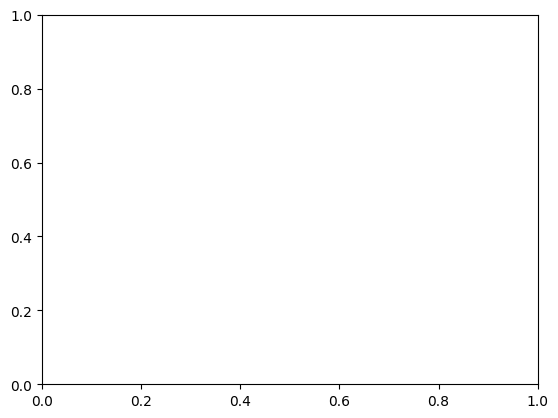

In [91]:
df.plot.scatter(x='NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabelaa('Normalized Expenditure per Student')
plt.ylabel('8th Grade Math Score')

**<The histogram displays the distribution of expenditure per student across the dataset. Each bar represents a range of expenditure values, and the height of the bar indicates the frequency (number of occurrences) of expenditure values falling within that range. This chart helps visualize how spending per student is distributed within the dataset, providing insights into the typical expenditure levels.>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

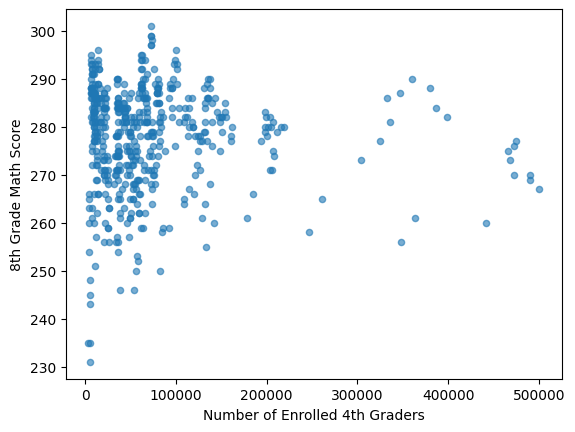

In [92]:
df.plot.scatter(x='TOTAL_8', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Number of Enrolled 4th Graders')
plt.ylabel('8th Grade Math Score')

**<The Kernel Density Estimate (KDE) plot illustrates the distribution of expenditure per student in the dataset. The curve represents the estimated probability density of different expenditure per student values. Areas under the curve indicate regions of higher density, offering insights into the typical expenditure per student and its variability across the dataset.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [67]:
from sklearn.model_selection import train_test_split

In [93]:
# X =
# y = 

X = df[['NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE'] 
y.fillna(y.median(), inplace=True)

KeyError: "['NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT'] not in index"

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=37)



TypeError: Singleton array array(0) cannot be considered a valid collection.

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [95]:
from sklearn.model_selection import LinearRegression

ImportError: cannot import name 'LinearRegression' from 'sklearn.model_selection' (/Users/maxklonke/Documents/UMICH/2023-Tutorials-main/env/lib/python3.11/site-packages/sklearn/model_selection/__init__.py)

In [96]:
# create your model here
model = LinearRegression()

In [97]:
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [73]:
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [77]:
ROOT_MEAN_SQUARED_ERROR = np.mean((model.predict(X_test)-y_test)**2)**0.5
R_SQUARED = model.score(X_test, y_test)
MEAN_ABSOLUTE_ERROR = np.mean(np.abs(model.predict(X_test)-y_test))

print("root mean squared error was:", ROOT_MEAN_SQUARED_ERROR)
print("r squared error was:", R_SQUARED)
print("mean absolute error was:", MEAN_ABSOLUTE_ERROR) 

NameError: name 'X_test' is not defined

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [78]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

NameError: name 'X_test' is not defined

<Figure size 1200x600 with 0 Axes>

In [79]:
col_name = 'NORMALIZED_TOTAL_EXPENDITURE_PER_STUDENT'
print(X_test)

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 Score')
plt.title("Model Behavior On Training Set")

NameError: name 'X_test' is not defined

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**